In [2]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

In [3]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all
Train Basin File Exists: True


In [4]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":6,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [5]:
lstmNoPhysics.train()

2024-12-20 14:01:17,445: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2012_140117/output.log initialized.
2024-12-20 14:01:17,447: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2012_140117
2024-12-20 14:01:17,449: ### Run configurations for testing_run
2024-12-20 14:01:17,537: experiment_name: testing_run
2024-12-20 14:01:17,541: train_basin_file: warm springs
2024-12-20 14:01:17,547: validation_basin_file: warm springs
2024-12-20 14:01:17,549: test_basin_file: warm springs
2024-12-20 14:01:17,551: train_start_date: 1994-10-01 00:00:00
2024-12-20 14:01:17,553: train_end_date: 2002-09-30 00:00:00
2024-12-20 14:01:17,554: validation_start_date: 2002-10-01 00:00:00
2024-12-20 14:01:17,556: validation_end_date: 2005-09-30 00:00:00
2024-12-20 14:01:17,557: test_start_date: 2005-10-01 00:00:00
2024-12-20 14:01:17,559: test_end_date: 2009-09-30 00:00:00
2024-12-20 14:01:

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


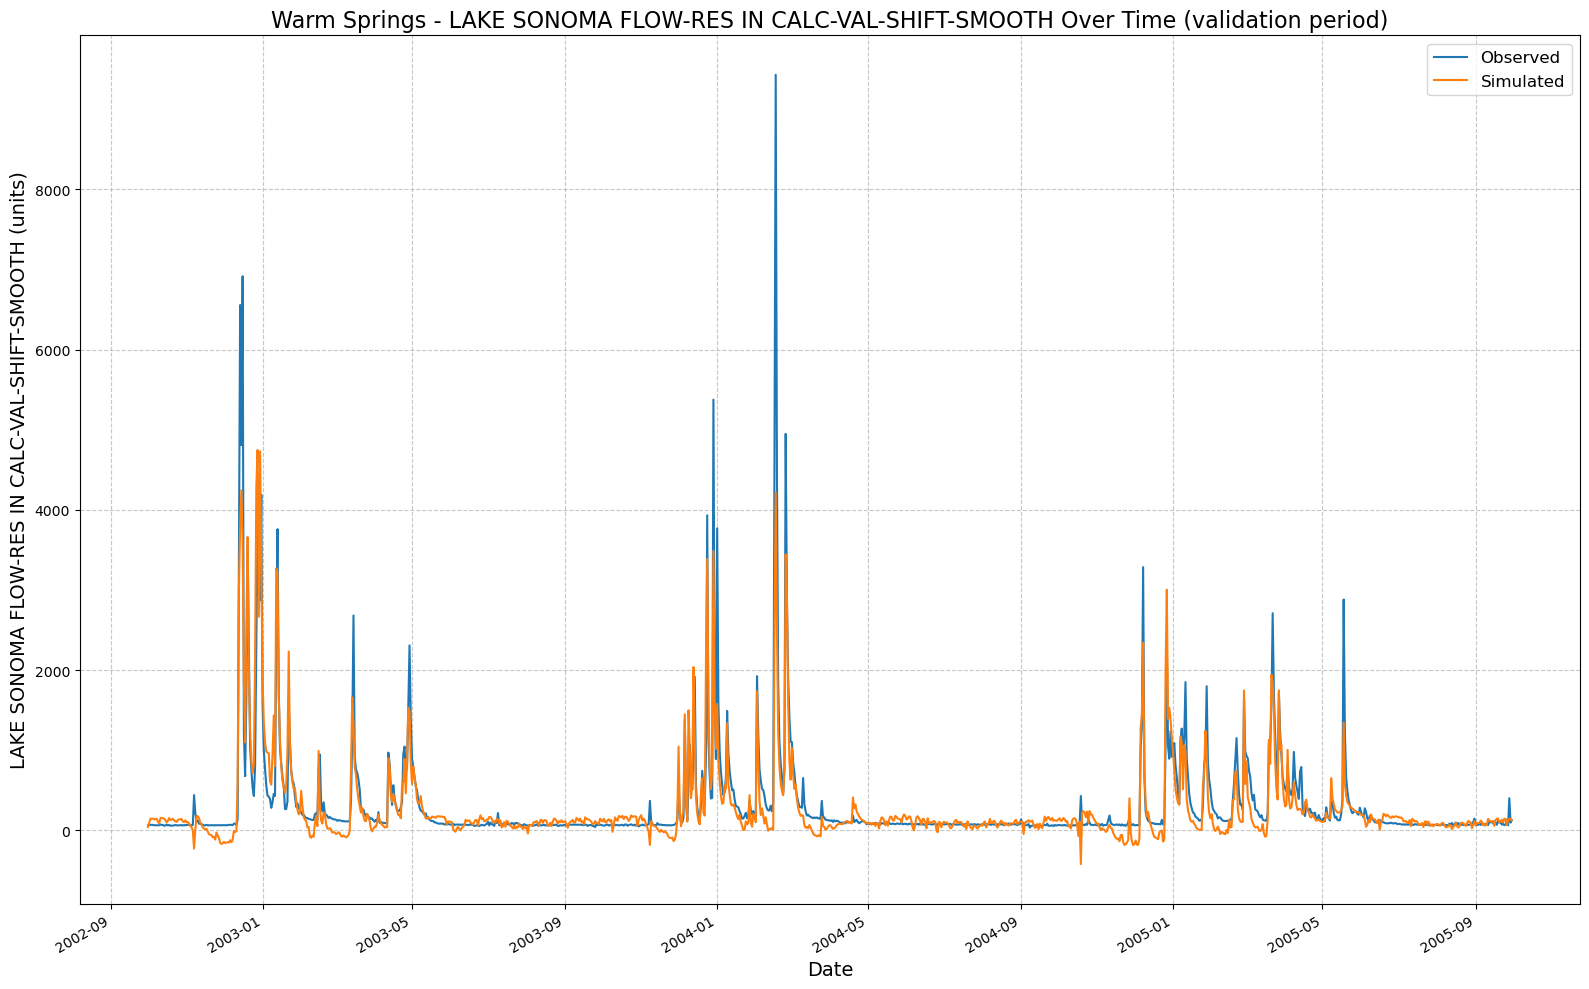

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2012_140117/results_output_validation.csv


{'NSE': 0.7808823436498642,
 'MSE': 107431.984375,
 'RMSE': 327.7681869477268,
 'KGE': 0.7468578475843312,
 'Alpha-NSE': 0.8206259721841472,
 'Beta-KGE': 0.8603187203407288,
 'Beta-NSE': -0.06493904631486366,
 'Pearson-r': 0.8886669519526935,
 'FHV': -20.187999308109283,
 'FMS': -16.909367303463693,
 'FLV': -1643.218151256253,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 44.118709564208984}

In [6]:
lstmNoPhysics.results('validation')

2024-12-20 14:03:15,588: Using the model weights from /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2012_140117/model_epoch006.pt
# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]
2024-12-20 14:03:17,221: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2012_140117/test/model_epoch006/test_metrics.csv
2024-12-20 14:03:17,232: Stored results at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2012_140117/test/model_epoch006/test_results.p
Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


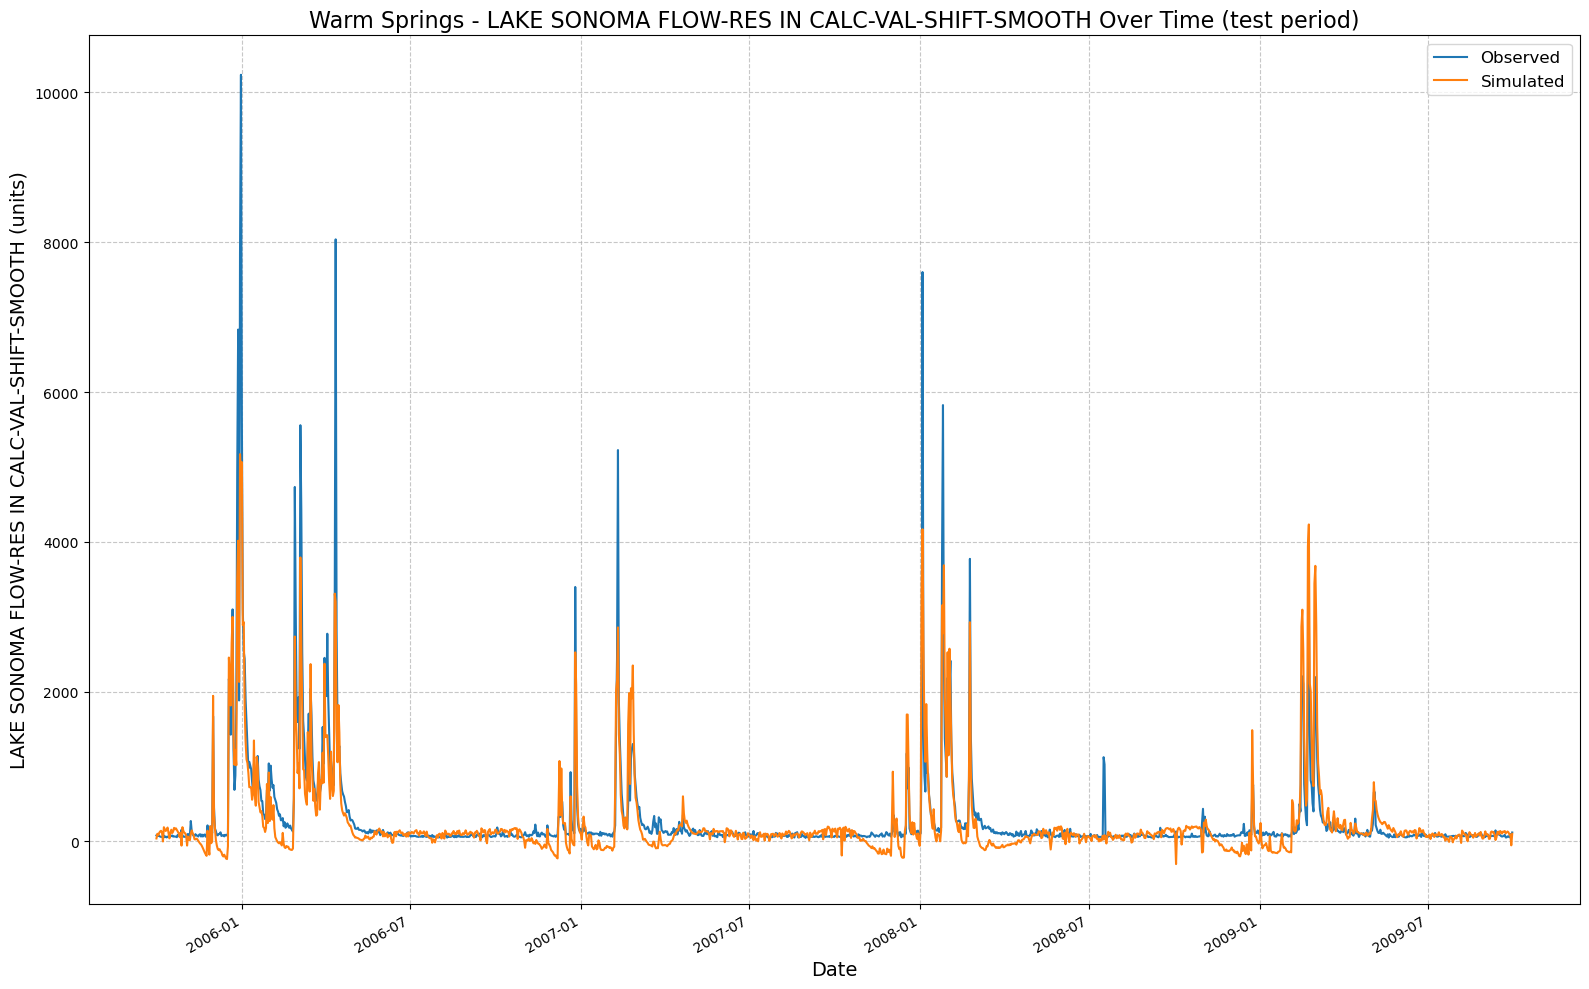

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2012_140117/results_output_test.csv


{'NSE': 0.7631971687078476,
 'MSE': 126726.0859375,
 'RMSE': 355.98607548259525,
 'KGE': 0.7196086384114238,
 'Alpha-NSE': 0.819166651579116,
 'Beta-KGE': 0.8234416842460632,
 'Beta-NSE': -0.0718038581133909,
 'Pearson-r': 0.8785678094963281,
 'FHV': -21.16348445415497,
 'FMS': 53.92874291946491,
 'FLV': -576.1521958374929,
 'Peak-Timing': 0.5,
 'Peak-MAPE': 56.29770755767822}

In [7]:
lstmNoPhysics.results(period='test')